# Task 1 - Data Analysis and Preprocessing

### Load and Explore the data
- Import liberaries
- Load datasets
- Understand the feature `Fraud_data`, `ipaddress_to_country` and `creditcard`

In [1]:
# Directory Setup and Warning Suppression in Python Script
# This script configures the Python environment by appending the parent directory to the system path 
# and suppressing warning messages for cleaner output.
import os
import sys
import pandas as pd 
import socket
import struct

current_dir = os.getcwd()
# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Import data preprocessing and visualization classes for use in the project.
from scripts.data_preprocessor import DataPreprocessor
from scripts.Data_visualizer import DataVisualizer

##### File Paths for Datasets
This section defines the file paths for various datasets used in the project.

In [3]:
# Define file paths for various datasets used in the project.
fraud_file_path = "../data/Fraud_Data.csv"
ipaddress_file_path = "../data/IpAddress_to_Country.csv"
creditcard_file_path = "../data/creditcard.csv"

Initialize the DataPreprocessor

In [4]:
# Initialize the DataPreprocessor with specified file paths for datasets.
processor = DataPreprocessor(fraud_file_path, ipaddress_file_path, creditcard_file_path)

Load datasets

In [5]:
# Load datasets using the DataPreprocessor instance.
fraud_data, ipaddress_data, creditcard_data = processor.load_data()

2025-02-07 15:51:14,975 - INFO - Data loaded successfully!


In [6]:
# Perform exploratory data analysis on the loaded datasets.
processor.explore_data()

2025-02-07 15:51:25,118 - INFO - Exploring data:
2025-02-07 15:51:25,615 - INFO - 
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  


### 1. Handle Missing Values

In [7]:
# Check for missing values in the fraud data DataFrame.
missing_values = processor.check_missing_values(fraud_data)

2025-02-07 15:51:34,920 - INFO - Missing values: 
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


### 2. Data Cleaning

Check duplicate

In [8]:
# Count the number of duplicate entries in the fraud data DataFrame.
duplicate_count = fraud_data.duplicated().sum()
duplicate_count

np.int64(0)

In [9]:
# Check duplicates for ipaddress
ipaddress_data.duplicated().sum()

np.int64(0)

#### Convert Time Columns to Datetime
This code converts the `signup_time` and `purchase_time` columns in the `fraud_data` DataFrame to datetime format, using `pd.to_datetime`. Any conversion errors will result in `NaT` (Not a Time) values.


In [10]:
# Convert 'signup_time' and 'purchase_time' columns to datetime format.
fraud_data['signup_time'] = pd.to_datetime(fraud_data['signup_time'], errors='coerce')
fraud_data['purchase_time'] = pd.to_datetime(fraud_data['purchase_time'], errors='coerce')

### 3. Exploratory Data Analysis (EDA)

Initialize Data Visualizer

In [11]:
# Initialize the DataVisualizer with the fraud data DataFrame.
visualizer = DataVisualizer(fraud_data)

### Univariant Analysis

##### Plot Histograms of Numerical Features

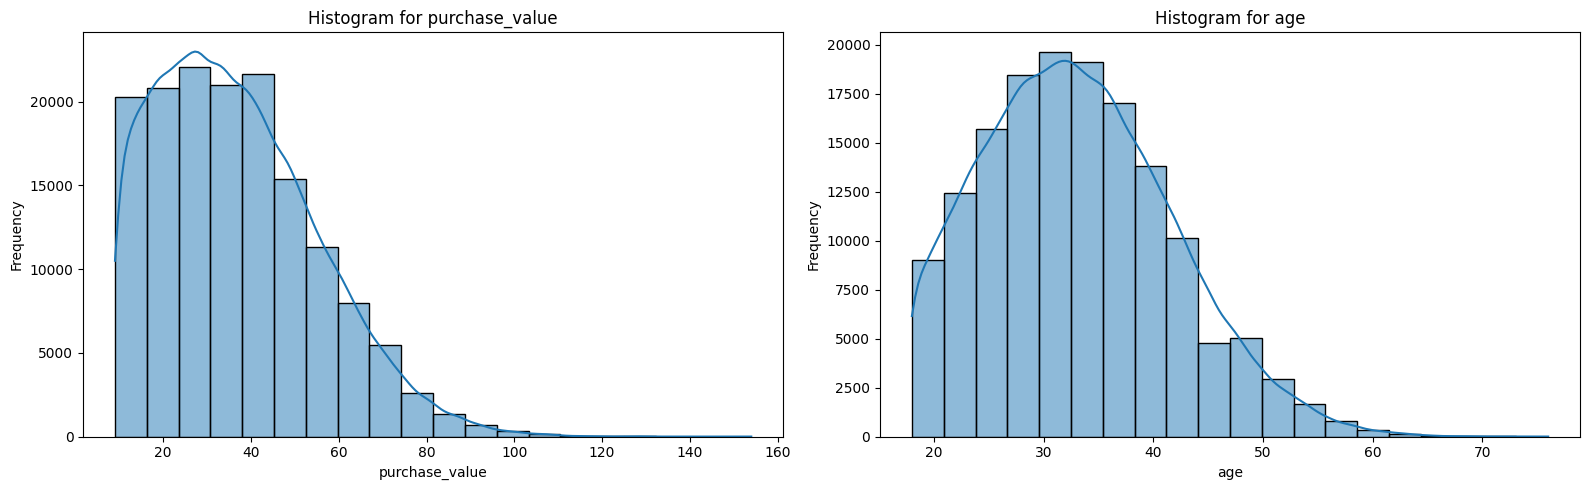

2025-02-07 15:52:11,583 - INFO - Histograms plotted successfully!


In [12]:
# Define numerical features to visualize.
numerical_features = ['purchase_value', 'age']

# Plot histograms for the specified numerical features.
visualizer.plot_histogram(numerical_features)

#### Purchase Value Histogram:
- **Shape**: Right-skewed distribution.
- **Peak**: Most frequent purchase values are around 20-40.

**Insight**: Higher purchase values are less common, indicating potential focus on lower-value transactions.
#### Age Histogram:
- **Shape**: Right-skewed distribution.
- **Peak**: Most frequent ages are in the 20-30 range.

**Insight**: Younger age groups are more active, which could influence marketing strategies.

##### Plot Bar Charts of Categorical Features

2025-02-07 15:52:26,875 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-07 15:52:26,881 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


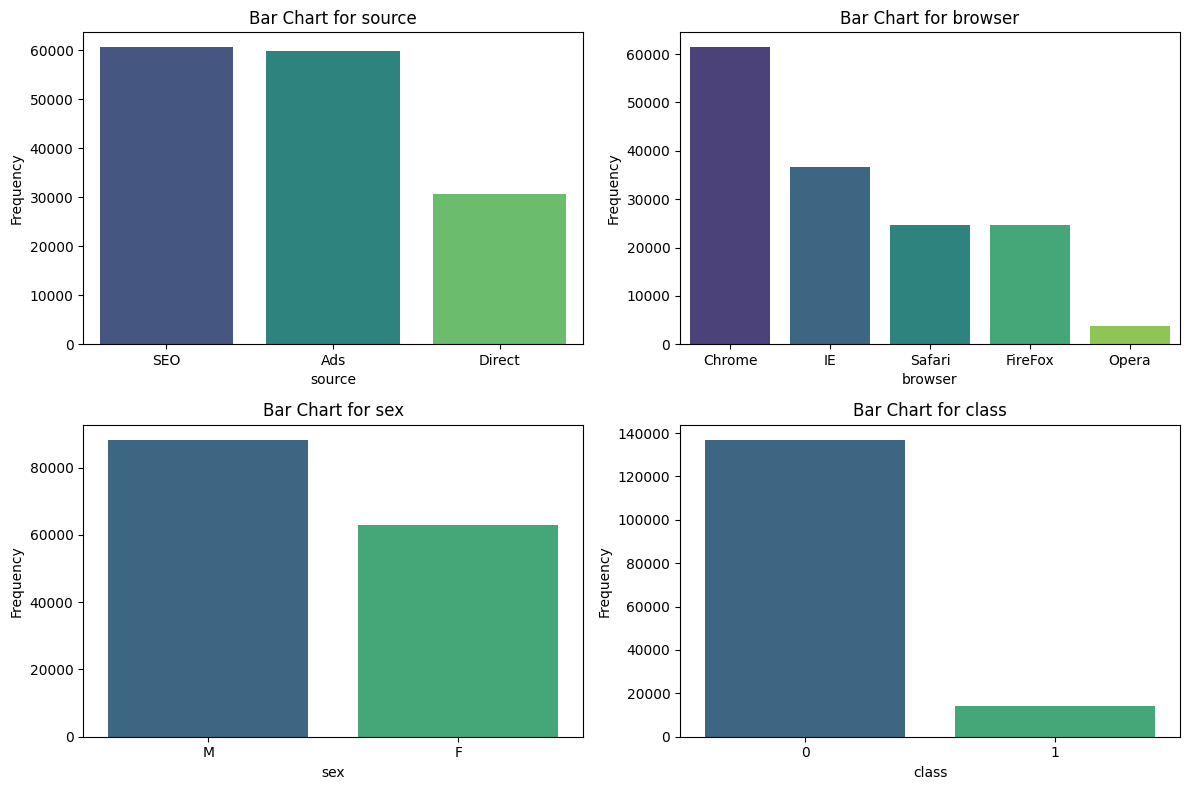

2025-02-07 15:52:27,076 - INFO - Bar charts plotted successfully!


In [13]:
# Define categorical features to visualize.
categorical_features = ['source', 'browser', 'sex', 'class']

# Plot bar charts for the specified categorical features.
visualizer.plot_bar_chart(categorical_features)

### Key insights
##### Source:
- **SEO and Ads**: Most common sources, with similar frequencies.
- **Direct**: Less frequent, suggesting lower direct engagement.
##### Browser:
- **Chrome**: Most popular browser by a large margin.
- **IE, Safari, and Firefox**: Moderate usage.
- **Opera**: Least used.
##### Sex:
- **Males (M)**: Higher frequency than females (F).
##### Class:
- **Class 0**: Dominates the dataset.
- **Class 1**: Significantly less frequent, indicating a minority category.

**Insight**: **SEO** and **Ads** drive most traffic; **Chrome** is the preferred browser.  **Males** are the majority users, and **Class 0** is predominant.

### Bivariate analysis

##### Plot Correlation Matrix of Numerical Features

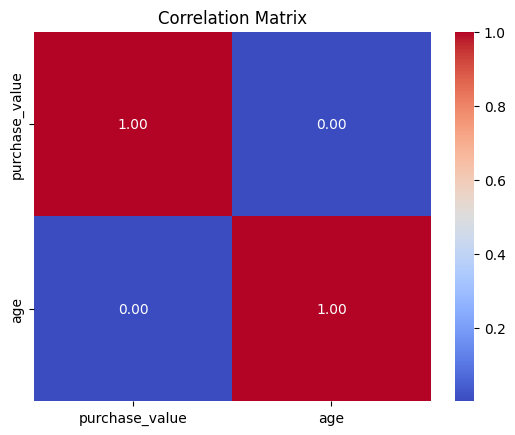

2025-02-07 15:53:00,646 - INFO - Correlation matrix plotted successfully!


In [14]:
# Get the columns of the fraud data DataFrame.
corr = fraud_data.columns

# Plot the correlation matrix for the specified numerical features.
visualizer.plot_correlation_matrix(numerical_features)

<Figure size 1600x1000 with 0 Axes>

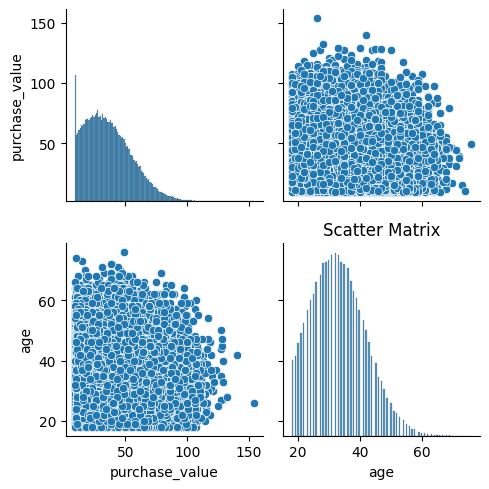

2025-02-07 15:53:05,249 - INFO - Scatter matrix plotted successfully!


In [15]:
# Plot a scatter matrix for the specified numerical features.
visualizer.plot_scatter_matrix(numerical_features)

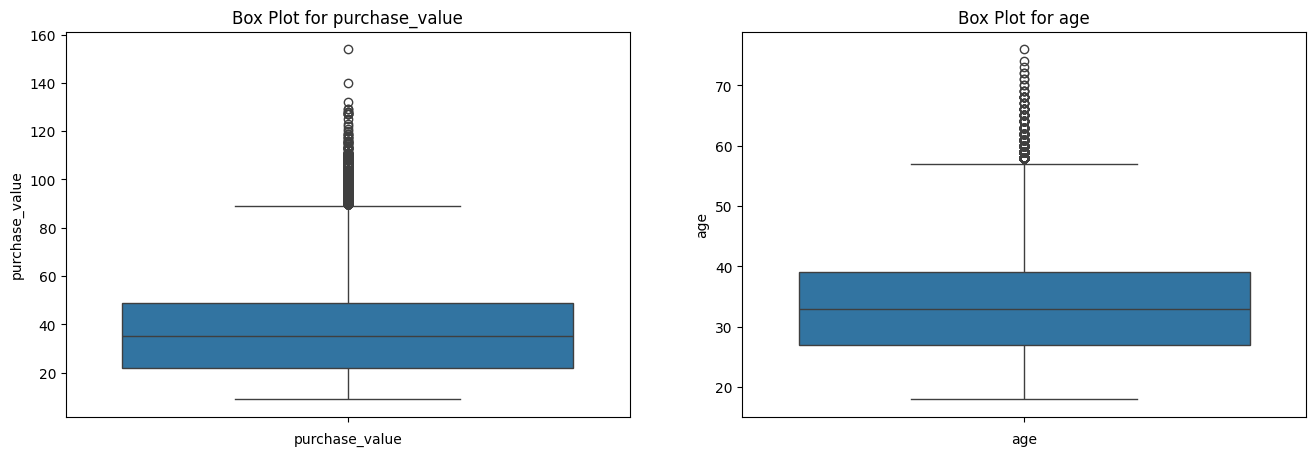

In [16]:
# Plot box plots for the specified numerical features.
visualizer.plot_box_plot(numerical_features)

### Key insight
**Purchase Value**:
- Median around 40.
- Many outliers above 100.

**Age**:
- Median around 30.
- Outliers above 60.

**Insight**: Both plots show right-skewed data with significant outliers.

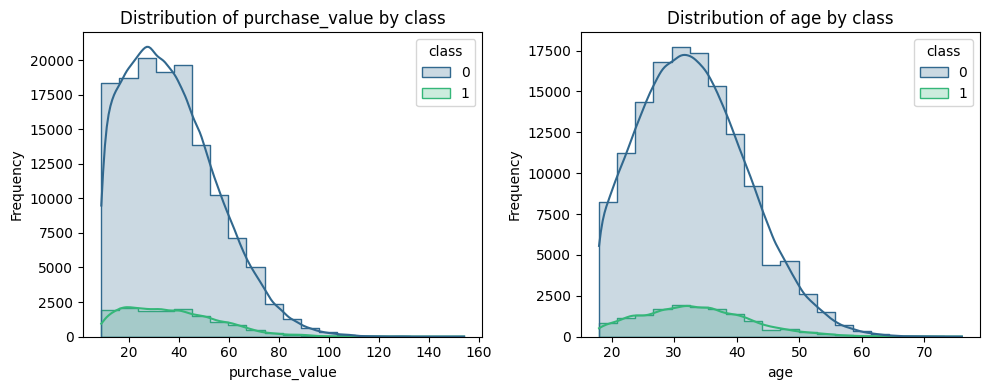

2025-02-07 15:53:22,913 - INFO - Feature distributions with respect to target class plotted successfully!


In [17]:
# Plot the distribution of numerical features by the specified class variable.
visualizer.plot_distribution_with_class(numerical_features, 'class', feature_type='numerical')

### Distribution by Class

#### Purchase Value

- **Class 0**: Dominates.
- **Class 1**: Lower frequency.

#### Age

- **Class 0**: Predominant.
- **Class 1**: Lower frequency.

**Overall Insight**: Class 0 is more prevalent in both purchase value and age distributions.

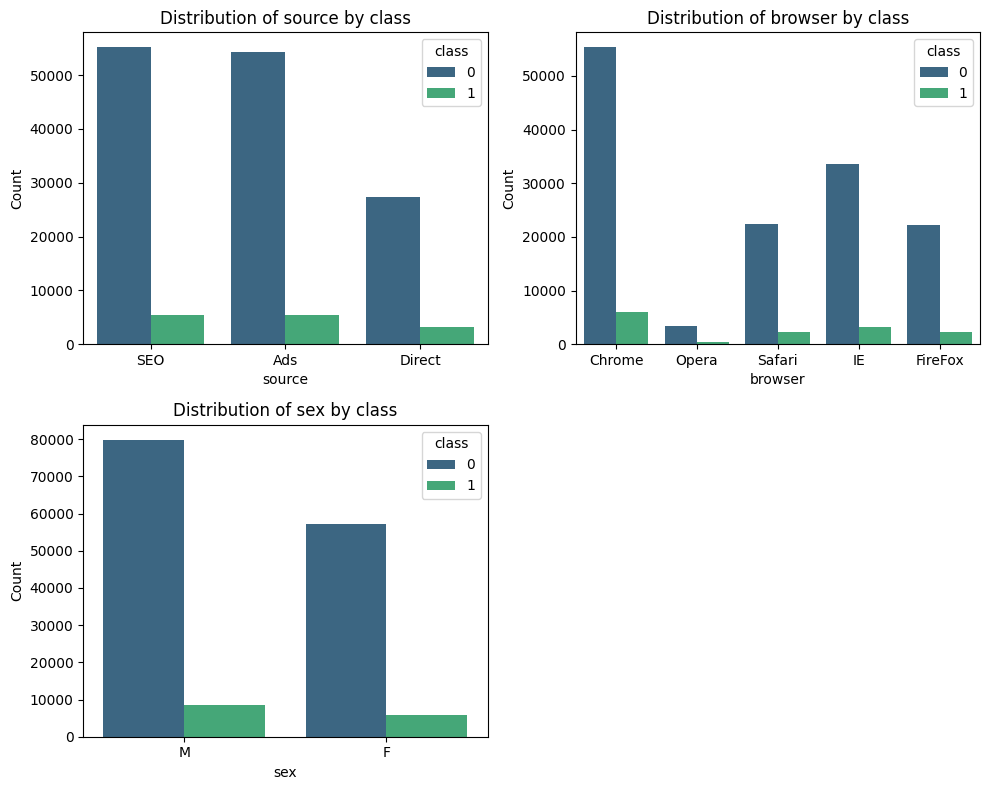

2025-02-07 15:53:34,186 - INFO - Feature distributions with respect to target class plotted successfully!


In [18]:
# Define categorical features to visualize.
categorical_features = ['source', 'browser', 'sex']

# Plot the distribution of categorical features by the specified class variable.
visualizer.plot_distribution_with_class(categorical_features, 'class', feature_type='categorical')

### Insights:
- **Source Distribution**: SEO and Ads are dominated by class 0; Direct visits have a slightly higher class 1 proportion.
- **Browser Distribution**: Chrome leads in usage, mostly by class 0; class 1 has minimal presence across all browsers.
- **Sex Distribution**: Males dominate both classes, especially class 0; class 1 has a relatively higher proportion of females.

2025-02-07 15:53:44,911 - INFO - Plotting scatter plot...


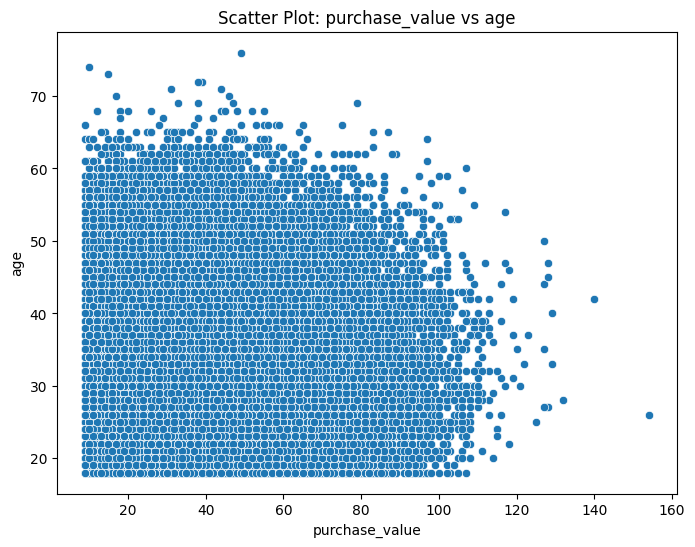

In [19]:
# Plot a scatter plot of purchase_value against age.
visualizer.scatter_plot('purchase_value', 'age')

### 4. Merge Datasets for Geolocation Analysis

##### Convert IP Addresses to Integer Representation

In [20]:
def ip_to_int(ip):
    """Convert an IP address to its integer representation."""
    try:
        return struct.unpack("!I", socket.inet_aton(ip))[0]
    except socket.error:
        return None  # Handle invalid IPs gracefully

# Convert IP addresses in fraud data to integer format
fraud_data['ip_int'] = fraud_data['ip_address'].apply(lambda x: ip_to_int(str(int(x))) if not pd.isna(x) else None)

In [21]:
import numpy as np
# Convert bounds in the country data to int64
ipaddress_data['lower_bound_ip_address'] = ipaddress_data['lower_bound_ip_address'].astype(np.int64)
ipaddress_data['upper_bound_ip_address'] = ipaddress_data['upper_bound_ip_address'].astype(np.int64)

# Ensure fraud_data's ip_int is int64 as well
fraud_data['ip_int'] = fraud_data['ip_int'].astype(np.int64)

# Sort both datasets for merge_asof
fraud_data.sort_values('ip_int', inplace=True)
ipaddress_data.sort_values('lower_bound_ip_address', inplace=True)

# Merge the datasets using merge_asof
merged_data = pd.merge_asof(
    fraud_data,
    ipaddress_data,
    left_on='ip_int',
    right_on='lower_bound_ip_address',
    direction='backward'
)

# Filter rows where ip_int is within the lower and upper bounds
merged_data = merged_data[(merged_data['ip_int'] >= merged_data['lower_bound_ip_address']) &
                          (merged_data['ip_int'] <= merged_data['upper_bound_ip_address'])]

# Drop unnecessary columns
merged_data.drop(columns=['ip_address','lower_bound_ip_address', 'upper_bound_ip_address'], inplace=True)

# OPTIONAL: Save to csv file
merged_data.to_csv('../data/merged_fraud_data.csv')

In [22]:
merged_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,ip_int,country
634,247547,2015-06-28 03:00:34,2015-08-09 03:57:29,47,KIXYSVCHIPQBR,SEO,Safari,F,30,0,16778864,Australia
635,220737,2015-01-28 14:21:11,2015-02-11 20:28:28,15,PKYOWQKWGJNJI,SEO,Chrome,F,34,0,16842045,Thailand
636,390400,2015-03-19 20:49:09,2015-04-11 23:41:23,44,LVCSXLISZHVUO,Ads,IE,M,29,0,16843656,China
637,69592,2015-02-24 06:11:57,2015-05-23 16:40:14,55,UHAUHNXXUADJE,Direct,Chrome,F,30,0,16938732,China
638,174987,2015-07-07 12:58:11,2015-11-03 04:04:30,51,XPGPMOHIDRMGE,SEO,Chrome,F,37,0,16971984,Thailand


#### Geolocation analysis

In [23]:
#  load merged fraud data for geolocation analysis
geo_loc =pd.read_csv('../data/merged_fraud_data.csv')

In [24]:
from scripts.geolocation_analysis import GeolocationFraudAnalysis

In [25]:
# Initialize the class with dataset
fraud_analysis = GeolocationFraudAnalysis(geo_loc)

2025-02-07 15:54:15,509 - INFO - GeolocationFraudAnalysis initialized with country data.


In [26]:
fraud_rate_by_country = fraud_analysis.analyze_fraud_by_country()

2025-02-07 15:54:19,846 - INFO - Analyzing fraud distribution by country.
2025-02-07 15:54:19,930 - INFO - Fraud analysis by country completed. Data: 
               country  fraud_rate
0          Afghanistan    0.166667
1              Albania         NaN
2              Algeria    0.106557
3               Angola    0.041667
4  Antigua and Barbuda         NaN


2025-02-07 15:54:24,498 - INFO - Visualizing overall fraud distribution.


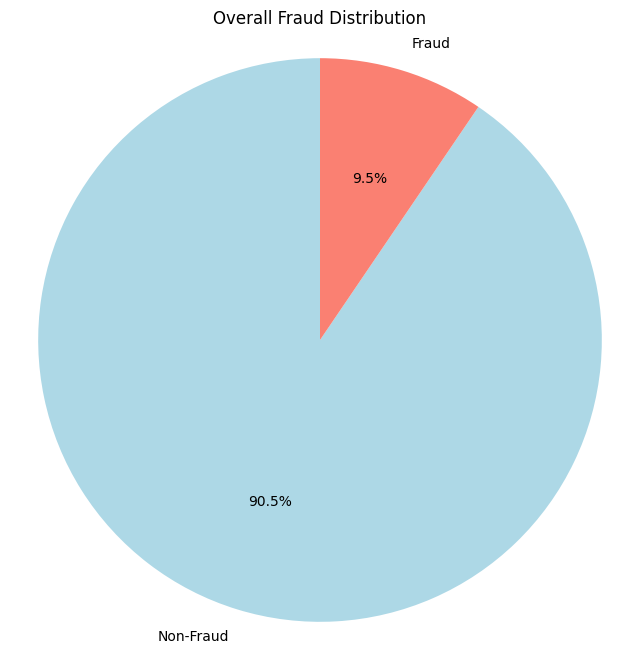

2025-02-07 15:54:24,579 - INFO - Overall fraud distribution pie chart displayed.


In [27]:
fraud_analysis.visualize_fraud_distribution(fraud_rate_by_country)

- **Fraud**: Represents 9.5% of the total transactions.
- **Non-Fraud**: Dominates with 90.5%.
- **Insight**: Fraudulent activity is a minority but still significant enough to warrant attention in prevention strategies.

2025-02-07 15:54:30,863 - INFO - Visualizing top 10 countries by fraud rate.


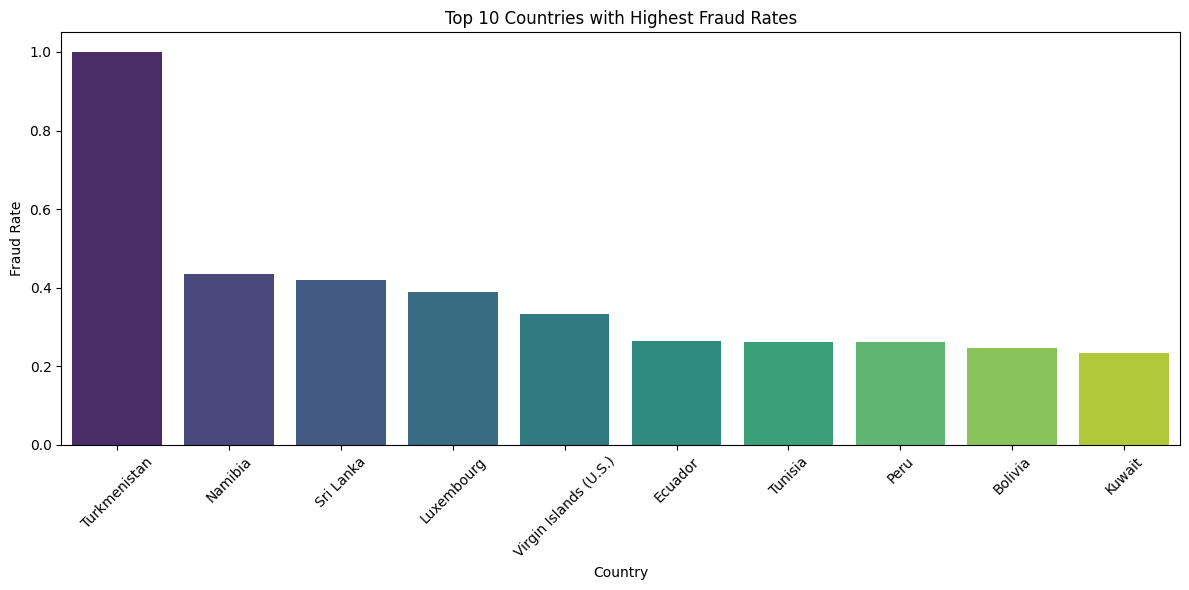

2025-02-07 15:54:31,069 - INFO - Top 10 countries by fraud rate bar chart displayed.


In [28]:
fraud_analysis.visualize_top_10_fraud_by_country(fraud_rate_by_country)

#### key insights
- **Turkmenistan**: Significantly highest fraud rate, needing urgent attention.
- **Namibia and Sri Lanka**: Moderate fraud rates, similar to each other.
- **Luxembourg and Virgin Islands (U.S.)**: Slightly lower fraud rates.
- **Ecuador, Tunisia, Peru, Bolivia, Kuwait**: Lowest among the top 10, but still notable.

### 5. Feature Engineering

In [29]:
# Apply feature engineering to the merged data.
merged_data = processor.feature_engineering(merged_data)

2025-02-07 15:54:37,569 - INFO - Performing feature engineering...
2025-02-07 15:54:37,662 - INFO - Feature engineering completed: added 'hour_of_day' and 'day_of_week'.


In [30]:
merged_data =processor.calculate_transaction_features(merged_data)

2025-02-07 15:54:40,194 - INFO - Calculating transaction frequency and velocity...
2025-02-07 15:54:40,475 - INFO - Transaction features calculated and merged.


In [31]:
merged_data

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,ip_int,country,hour_of_day,day_of_week,time_diff,transaction_frequency,average_velocity
0,2,2015-01-11 03:47:13,2015-02-21 10:03:37,54,FGBQNDNBETFJJ,SEO,Chrome,F,25,0,880217484,United States,10,5,0.0,1,0.0
1,4,2015-06-02 16:40:57,2015-09-26 21:32:16,41,MKFUIVOHLJBYN,Direct,Safari,F,38,0,2785906106,Switzerland,21,5,0.0,1,0.0
2,8,2015-05-28 07:53:06,2015-08-13 11:53:07,47,SCQGQALXBUQZJ,SEO,Chrome,M,25,0,356056736,United States,11,3,0.0,1,0.0
3,12,2015-01-10 06:25:12,2015-03-04 20:56:37,35,MSNWCFEHKTIOY,Ads,Safari,M,19,0,2985180352,Mexico,20,2,0.0,1,0.0
4,16,2015-02-03 13:48:23,2015-03-12 12:46:23,9,FROZWSSWOHZBE,Direct,IE,M,32,0,578312545,United States,12,3,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129141,399992,2015-06-04 17:43:28,2015-09-30 07:19:17,82,CNVFEDSCAWXGS,Direct,Safari,M,59,0,1549469282,France,7,2,0.0,1,0.0
129142,399993,2015-07-30 03:41:08,2015-10-01 07:16:25,20,XJMTBAKOHKTGR,Direct,IE,F,37,0,2755338335,Germany,7,3,0.0,1,0.0
129143,399995,2015-03-10 05:19:31,2015-06-05 23:36:56,33,RYXNXTOXIYRQG,Direct,FireFox,F,35,0,3701447303,Japan,23,4,0.0,1,0.0
129144,399997,2015-06-30 09:02:16,2015-10-07 20:56:54,66,XFNGDCCMMBTCB,Direct,Chrome,M,48,0,3454704355,United States,20,2,0.0,1,0.0


In [32]:
merged_data.time_diff.unique()

array([0.])

### 6. Normalization and Scaling

In [33]:
# Define the columns to be normalized.
columns_to_be_normalized = ['purchase_value', 'age']

# Normalize the specified columns in the merged data.
normalized_data = processor.normalize_data(merged_data, columns_to_be_normalized)

2025-02-07 15:54:50,645 - INFO - Normalizing data...
2025-02-07 15:54:50,651 - INFO - Dataset normalized successfully using Min-Max scaling.


In [34]:
normalized_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,class,ip_int,country,hour_of_day,day_of_week,time_diff,transaction_frequency,average_velocity
0,2,2015-01-11 03:47:13,2015-02-21 10:03:37,0.310345,FGBQNDNBETFJJ,SEO,Chrome,F,0.120690,0,880217484,United States,10,5,0.0,1,0.0
1,4,2015-06-02 16:40:57,2015-09-26 21:32:16,0.220690,MKFUIVOHLJBYN,Direct,Safari,F,0.344828,0,2785906106,Switzerland,21,5,0.0,1,0.0
2,8,2015-05-28 07:53:06,2015-08-13 11:53:07,0.262069,SCQGQALXBUQZJ,SEO,Chrome,M,0.120690,0,356056736,United States,11,3,0.0,1,0.0
3,12,2015-01-10 06:25:12,2015-03-04 20:56:37,0.179310,MSNWCFEHKTIOY,Ads,Safari,M,0.017241,0,2985180352,Mexico,20,2,0.0,1,0.0
4,16,2015-02-03 13:48:23,2015-03-12 12:46:23,0.000000,FROZWSSWOHZBE,Direct,IE,M,0.241379,0,578312545,United States,12,3,0.0,1,0.0


### 7. Encode Categorical Features

Encode Categorical Features in Normalized Data

In [35]:
# Define the categorical features to be encoded.
categorical_features = ['source', 'browser', 'sex']

# Encode the specified categorical features in the normalized data.
processed_data = processor.encode_categorical_data(normalized_data, categorical_features)

2025-02-07 15:54:57,781 - INFO - Encoding categorical data...
2025-02-07 15:54:57,849 - INFO - Categorical data encoded successfully!


In [36]:
processed_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,age,class,ip_int,country,hour_of_day,...,time_diff,transaction_frequency,average_velocity,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,2,2015-01-11 03:47:13,2015-02-21 10:03:37,0.310345,FGBQNDNBETFJJ,0.120690,0,880217484,United States,10,...,0.0,1,0.0,0,1,0,0,0,0,0
1,4,2015-06-02 16:40:57,2015-09-26 21:32:16,0.220690,MKFUIVOHLJBYN,0.344828,0,2785906106,Switzerland,21,...,0.0,1,0.0,1,0,0,0,0,1,0
2,8,2015-05-28 07:53:06,2015-08-13 11:53:07,0.262069,SCQGQALXBUQZJ,0.120690,0,356056736,United States,11,...,0.0,1,0.0,0,1,0,0,0,0,1
3,12,2015-01-10 06:25:12,2015-03-04 20:56:37,0.179310,MSNWCFEHKTIOY,0.017241,0,2985180352,Mexico,20,...,0.0,1,0.0,0,0,0,0,0,1,1
4,16,2015-02-03 13:48:23,2015-03-12 12:46:23,0.000000,FROZWSSWOHZBE,0.241379,0,578312545,United States,12,...,0.0,1,0.0,1,0,0,1,0,0,1


##### Save Processed Data to CSV
This code saves the `processed_data` DataFrame to a CSV file named `proccessed_fraud_data.csv` in the `data` directory, excluding the index column.

In [37]:
# Save the processed data to a CSV file.
processed_data.to_csv('../data/proccessed_fraud_data.csv', index=False)

## End of data preprocessing!